# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_excel("daily_offers.xlsx",parse_dates=['delivery date'])

In [3]:
df=data.copy()

# 2. Exploring the dataset

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301,577.00


In [5]:
df.shape

(181673, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [7]:
df.corr()

,item_date,customer,country,application,thickness,width,product_ref,selling_price
item_date,1.000000,-0.008821,-0.015801,-0.015962,0.003075,0.020480,0.037441,0.004467
customer,-0.008821,1.000000,0.083560,0.000882,0.009589,0.009203,-0.007716,-0.000053
country,-0.015801,0.083560,1.000000,-0.019350,-0.019580,0.055295,-0.147389,0.002993
application,-0.015962,0.000882,-0.019350,1.000000,-0.059472,-0.204430,-0.131843,0.001462
thickness,0.003075,0.009589,-0.019580,-0.059472,1.000000,0.161714,0.038082,-0.001130
width,0.020480,0.009203,0.055295,-0.204430,0.161714,1.000000,-0.034460,0.000583
product_ref,0.037441,-0.007716,-0.147389,-0.131843,0.038082,-0.034460,1.000000,0.002118
selling_price,0.004467,-0.000053,0.002993,0.001462,-0.001130,0.000583,0.002118,1.000000


In [8]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


# 3. Data Cleaning

## 3.1 Dropping Irrelevant Columns

In [9]:
df=df.drop(columns=['id','item_date','material_ref','product_ref'],axis=1)

In [10]:
df.head(1)

,quantity tons,customer,country,status,item type,application,thickness,width,delivery date,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,20210701,854.0


## 3.2 Handling Missing Values

In [11]:
df.isnull().sum()

quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
delivery date     1
selling_price     1
dtype: int64

In [12]:
for x in df.columns:
    null=df[x].isnull().sum()
    percentage=(null/len(df))*100
    print(x,' :',"%.3f"%percentage,'%')
    

quantity tons  : 0.000 %
customer  : 0.001 %
country  : 0.015 %
status  : 0.001 %
item type  : 0.000 %
application  : 0.013 %
thickness  : 0.001 %
width  : 0.000 %
delivery date  : 0.001 %
selling_price  : 0.001 %


# Filling missing values

##### To fill the nan values we find the which entity have maximum frequecy in each column to find frequency we calculate the mode



In [13]:
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['application'].fillna(df.application.mode()[0],inplace=True)
df['customer'].fillna(df['customer'].mode()[0],inplace=True)
df['thickness'].fillna(df['thickness'].mean(),inplace=True)
df['selling_price'].fillna(df['selling_price'].mean(),inplace=True)
df['delivery date'].fillna(df['delivery date'].mode()[0],inplace=True)
df['status'].fillna(df['status'].mode()[0],inplace=True)

In [14]:
df.isna().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
delivery date    0
selling_price    0
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isna().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
delivery date    0
selling_price    0
dtype: int64

In [16]:
df.drop(df[df['quantity tons']=='e'].index,inplace=True) # dataset had a record with id='e'

## 3.3 Handling Outliers

<AxesSubplot:>

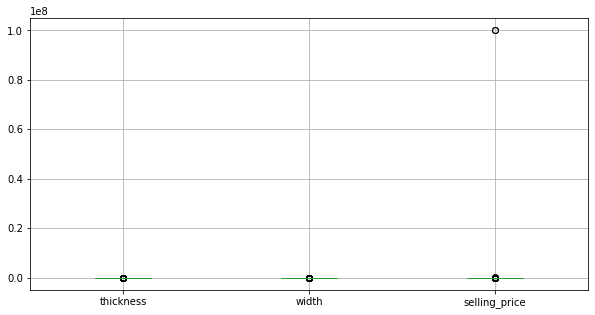

In [17]:
plt.figure(figsize = (10,5))
df.boxplot(column=['thickness','width','selling_price'])

In [18]:
df['zscore']=(df['selling_price']-df['selling_price'].mean())/df['selling_price'].std()
df

,quantity tons,customer,country,status,item type,application,thickness,width,delivery date,selling_price,zscore
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,20210701,854.00,-0.003207
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,20210401,1047.00,-0.002625
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,20210101,644.33,-0.003839
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,20210101,768.00,-0.003466
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,20210301,577.00,-0.004042
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,20200701,591.00,-0.004000
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,20200701,589.00,-0.004006
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,20200701,619.00,-0.003915
181671,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,20200701,601.00,-0.003969


In [19]:
df=(df[(df['zscore']>=-3) & (df['zscore']<=3)])

<AxesSubplot:>

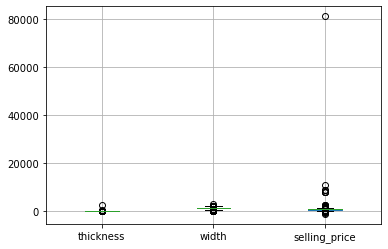

In [20]:
df.boxplot(column=['thickness','width','selling_price'])

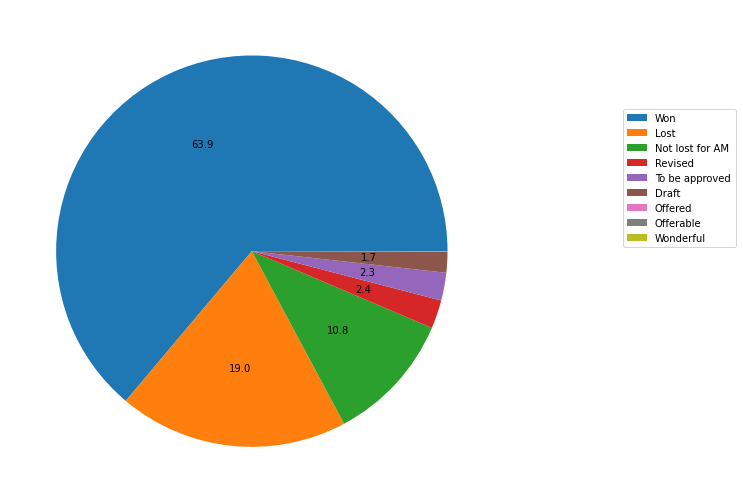

In [21]:
c=df.value_counts(df['status'])
def autopct(pct):
    return('%.1f'%pct) if pct>1 else ''
label=['Won','Lost','Not lost for AM ','Revised','To be approved','Draft','Offered','Offerable','Wonderful']
plt.figure(figsize = (9,9))
plt.pie(c,autopct=autopct)
plt.legend(label,loc='best',bbox_to_anchor=(1.5, 0.8))

Text(0, 0.5, 'selling price')

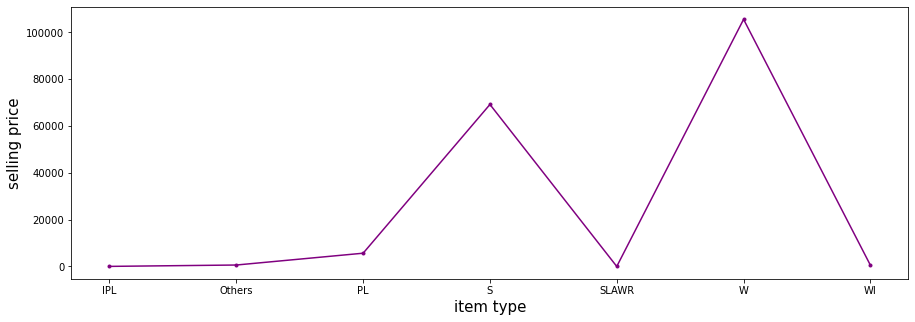

In [22]:
x=df['selling_price'].groupby(df['item type']).value_counts().unstack('item type').sum(axis=0)
plt.figure(figsize = (15,5))
plt.plot(x,marker='.',color='purple')
plt.xlabel('item type',fontsize=15)
plt.ylabel('selling price',fontsize=15)

Text(0, 0.5, 'no. of orders')

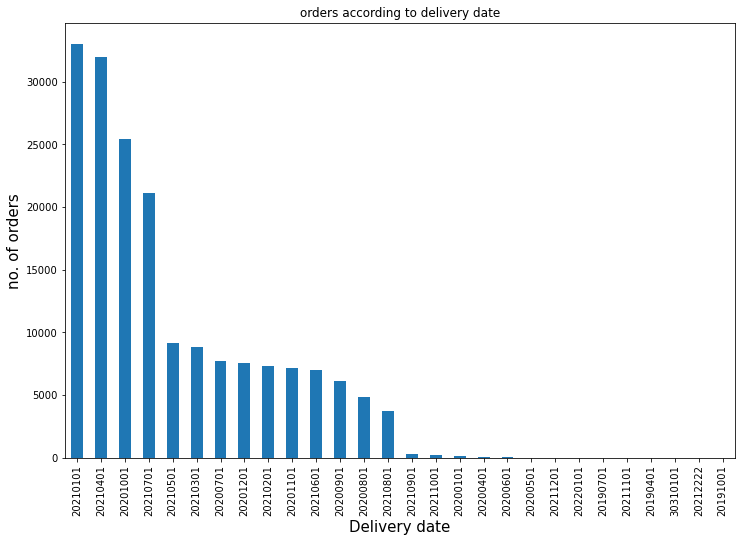

In [23]:
x=df['delivery date'].value_counts()
ax=x.plot(kind='bar',ylabel='orders',title='orders according to delivery date',figsize = (12,8))
ax.set_xlabel('Delivery date',fontsize=15)
ax.set_ylabel('no. of orders',fontsize=15)

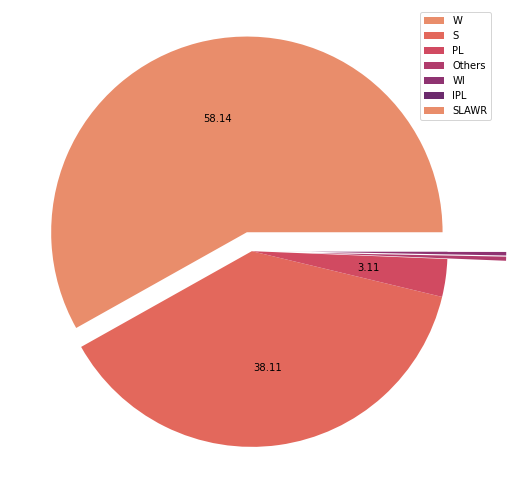

In [24]:
k=df['item type'].value_counts()
def autopct(pct):
   return ('%.2f' %pct) if pct > 1 else '' 
plt.figure(figsize = (9,9))
plt.pie(k,explode=[0.1,0,0,0.3,0.3,0,0],autopct=autopct,colors=sns.color_palette('flare'))
plt.legend(k.index)

In [25]:
df_model=df[['quantity tons','country','status','item type','application','thickness','width','selling_price']]

In [26]:
for x in df_model.columns:
    print(x," has ",len(df[x].unique())," categories")

quantity tons  has  181670  categories
country  has  17  categories
status  has  9  categories
item type  has  7  categories
application  has  30  categories
thickness  has  595  categories
width  has  1386  categories
selling_price  has  9794  categories


In [27]:
top10=[x for x in df_model['country'].value_counts().sort_values(ascending=False).head(15).index]
for x in top10:
    df_model[x]=np.where(df_model['country']==x,1,0)



C:\Users\pulki\AppData\Local\Temp\ipykernel_10032\3970385872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[x]=np.where(df_model['country']==x,1,0)
C:\Users\pulki\AppData\Local\Temp\ipykernel_10032\3970385872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[x]=np.where(df_model['country']==x,1,0)


In [28]:
top10=[x for x in df_model['status'].value_counts().sort_values(ascending=False).head(6).index]
def onehot(df,variable,top_labels):
    
    for label in top_labels:
        df_model[label]=np.where(df_model[variable]==label,1,0)

onehot(df_model,'status',top10)

In [29]:
top10=[x for x in df_model['item type'].value_counts().sort_values(ascending=False).head(7).index]
for x in top10:
    df_model[x]=np.where(df_model['item type']==x,1,0)

In [30]:
top10=[x for x in df_model['application'].value_counts().sort_values(ascending=False).head(15).index]
for x in top10:
    df_model[x]=np.where(df_model['application']==x,1,0)
 

In [31]:
df_model.drop(['country','status','item type','application'],axis=1,inplace=True)

<AxesSubplot:>

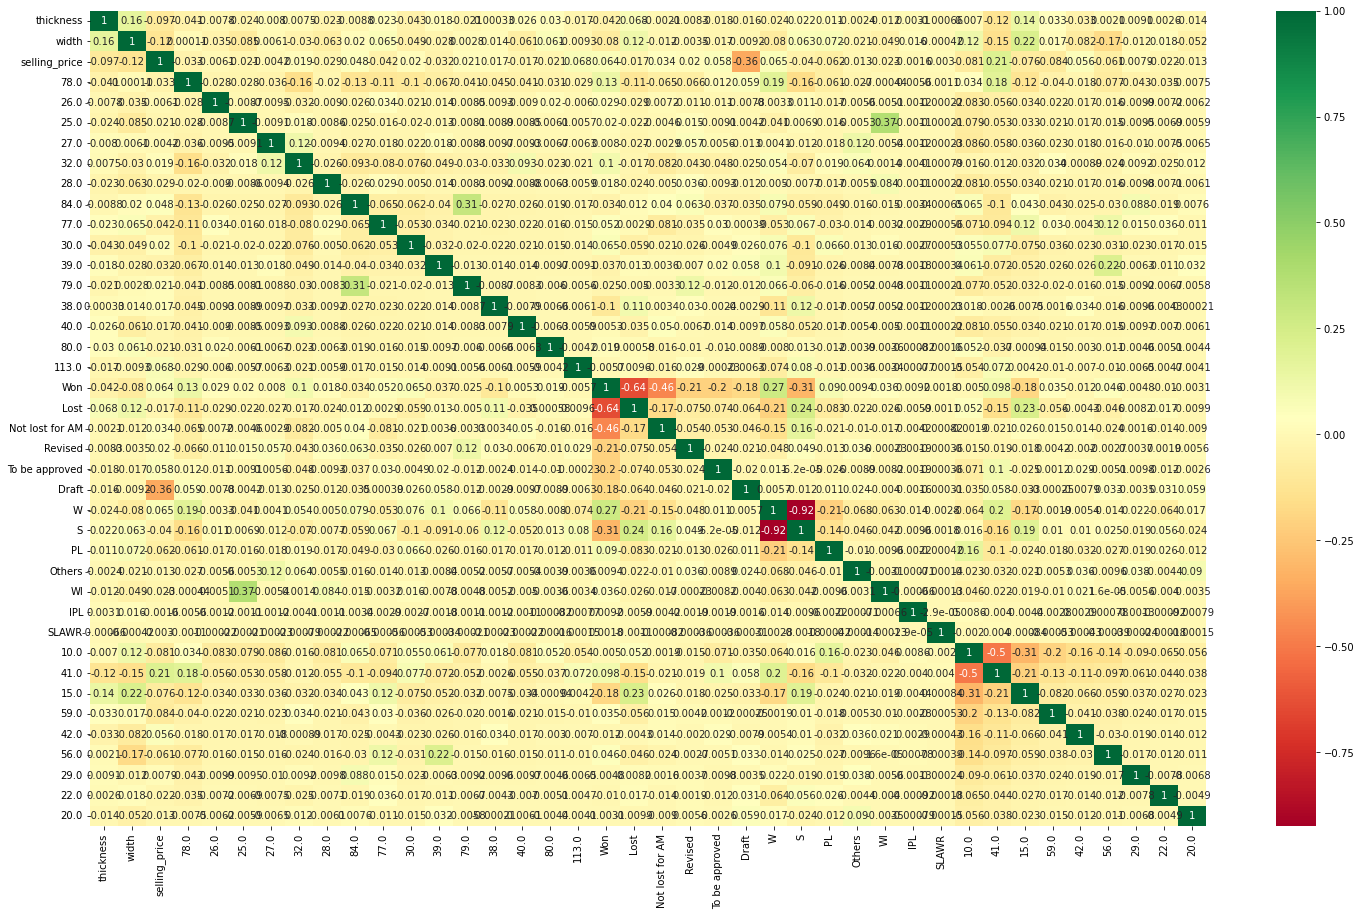

In [32]:
plt.figure(figsize=(25,15))
sns.heatmap(df_model.corr(),annot=True,cmap="RdYlGn",cbar=True)


In [33]:
# Independent and dependent features
X=df_model.drop("selling_price",axis=1)
Y=df_model.selling_price

In [34]:
# train test spilt 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=10)

In [35]:
## standardising dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [36]:
X_train=scaler.fit_transform(X_train)

C:\Users\pulki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\pulki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [37]:
X_test=scaler.transform(X_test)

C:\Users\pulki\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Model 1: Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [39]:
regression.fit(X_train,Y_train)

LinearRegression()

In [40]:
reg_pred=regression.predict(X_test)

In [41]:
print("coefficient: ",regression.coef_)

coefficient:  [-2.32672102e-01 -1.62186773e+01 -2.53134941e+01 -1.62463257e+01
 -7.74571319e-02 -3.75626623e+00  5.43705972e-01  3.59723804e+00
 -7.73219377e+00  1.25464816e+01 -1.28449933e+00  5.69921797e-01
  1.27372860e+00  2.91647142e+00  4.06125890e+00 -5.07593388e+00
 -3.29474824e+00  1.47935036e+01 -7.43696323e+01 -5.95753202e+01
 -4.15045321e+01 -2.04294660e+01 -1.44457259e+01 -1.27583167e+02
 -5.88441147e+13 -5.79300202e+13 -2.07318321e+13 -6.89344364e+12
 -6.35159796e+12 -1.41451754e+12 -2.94967141e+11  5.40022430e+00
  6.34479696e+01 -6.04193636e+00 -1.53455089e+01  1.87666388e+01
 -1.30293093e+01  3.82073744e+00  7.18635847e-01  3.01577521e+00]


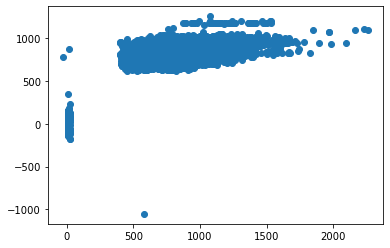

In [42]:
plt.scatter(Y_test,reg_pred)

In [43]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,reg_pred))

32212.770174482248


### Model 2: Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [ ]:
rf.fit(X_train,Y_train)

In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
print(mean_squared_error(Y_test,rf_pred))

In [ ]:
plt.scatter(Y_test,rf_pred)

### Model 3: Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lm=Lasso(alpha=0.1)
lm.fit(X_train,Y_train)
lm_pred=lm.predict(X_test)

In [ ]:
print(mean_squared_error(Y_test,lm_pred))

In [ ]:
plt.scatter(Y_test,lm_pred)

### Model 4: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
rm=Ridge(alpha=0.1)
rm.fit(X_train,Y_train)

In [ ]:
rm_pred=rm.predict(X_test)

In [ ]:
print(mean_squared_error(Y_test,lm_pred))

In [ ]:
plt.scatter(Y_test,rm_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(Y_test, rf_pred)

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
#Hyperparameter Tuning Randomforest

# Randomised search CV
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no. of features to consider at every split
max_features=['auto','sqrt']
#max no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# Min no. of samples required to split a node
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)

In [ ]:
plt.scatter(Y_test,predictions)

In [ ]:
sns.distplot(Y_test-predictions)


In [ ]:
rf_random.fit(X_train,Y_train)